<h1>Math</h1>

we begin by reviewing how to deal with text data in NLP

this directly ties into the previous notebook which was on using RNNs for modelling sequence data and serves as a good review (in fact we will have multiple reviews throughout this notebook , which are rather thorough and easy)

Text is also sequence data , but there is a major difference between text sequences and the continuous valued sequences we were dealing with in the previous section

That difference is , text is made of words and words are categorical objects , in other words they are not continuous

continuous : [1,0.5,-2,3,...]

categorical : ['the','quick','brown','fox','jumps','over','the','lazy','dog']

---

<h4>Dealing with Text</h4>

suppose we are given a sequence of words : ['the','quick','brown','fox','jumps','over','the','lazy','dog']

so $x_1$ = 'the' , $x_2$ = 'quick' , ...

but here is the problem , we know that in order to calculate the output of an RNN unit , we have to multiply each x by the input to hidden weight $W_{xh}$ , recall the formula for RNN :

$$h_t = \sigma(W_{xh}^Tx_t + W_{hh}h_{t-1}+b_h)$$

we can see that if x is a category then that is not possible

---

<h4>One-Hot Encoding</h4>

we might be tempted to think that , since we have categories , all we need to do is use one-hot encoding

so what we would do is , create an array which has length equal to the size of the vocabulary , in other words the number of words in the English language (typically we denote that with the capital letter V)

so here is how we are going to one-hot encode a word :

<ol>
    <li>create a vector of size V containing all 0s = [0,0,0,...,0]</li>
    <li>Then we are goint to create a mapping , where we have for each word a corresponding integer starting from 1 </li>
    <li>then once we have a map for each word to an integer , we simply set that corresponding integer to 1 for ex: <ul><li>a $\rightarrow$ [1,0,0,...,0] (index 1)</li><li>aa $\rightarrow$ [0,1,0,...,0] (index 2)</li><li>....</li><li>zoo $\rightarrow$ [0,0,0...,1] (index 1 million)</li></ul></li>
    <li>Eventually each of our vectors is jsut a bunch of zeros with only a single one at a unique position</li>
</ol>

so what happens after we do this ?

well now we can go back to our usual scenario , it we have a sequence of T words , and each of them becomes a vector of size V , then we have a TxV matrix which represents our sequence

This is the same shape as a generic TxD matrix which can then be passed to our RNN as normal

so lets do a very simple example :

suppose we have the sentence 'I like cats'

this is a sequence of length 3 (T=3) , because this sentence has 3 words

this might turn into the sequence of vectors [[0,0,0,1],[0,1,0,0],[1,0,0,0]]

for this simple example , we have assumed that our vocabulary contained only 4 words , which of course is much smaller than a real English language dataset

---

<h4>Problem</h4>

But there are some problems with this approach

some English datasets have about 1 million possible tokens/words 

that would lead to an extremely large one hot encoded feature vector which means that our weight matrix would also be very large

so we have a TxV matrix but V (or equivalently) is a very big number

Not only is the input large , but the input-hidden weight matrix will also be large !

---

<h4>Another problem</h4>

recall that we would like our input features to have some structure

if we also recall , one of the first earliest rules we encountered was 'Machine learning is nothing but a geometry problem'

This rule relies on the fact that there is some geometrical structure in the data

data vectors from the same class are probably close to each other

but what do one-hot encoded features look like ?

well if we take any two one-hot encoded vectors , ex , [1,0,0] vs [0,1,0] , and we calculate the Euclidean distance , we will always get $\sqrt{1^2+1^2} = \sqrt{2}$

it doesnot matter which two words we select because they are all one-hot encoded

so for ex , the distance between 'cat' and 'feline' is $\sqrt{2}$

and the distance between 'cat' and 'airplane' is also $\sqrt{2}$

In other words , this data has no useful geometrical structure

---

<h4>A better solution : Embeddings</h4>

so what can we do instead ?

well it would be nice if for each word , we could map them to a D dimensional vector

luckily we have just the tool for this , it is called an embedding layer

now we may be wondering , how can we make these vectors have a useful structure ? (we will get back to this later)

now we want to revise a coding trick

---

<h4>Coding Trick</h4>

consider what would happen if we multiply a one-hot encoded vector with a weight matrix

<img src='extras/32.1.PNG' width='400'><img>

now consider the one-hot encoded vector [0,1,0] multiplied by the same weight matrix

<img src='extras/32.2.PNG' width='400'><img>

now again with [0,0,1]

<img src='extras/32.3.PNG' width='400'><img>

---

<h4>What's the pattern ?</h4>

if the index in the one hot encoded vector which was set to 1 , was 1 then we get the first row of the weight matrix

<img src='extras/32.4.PNG' width='400'><img>

if the index is set to 2 , then we get the second row of the weight matrix

and if the index is set to 3 , then we get the third row of the weight matrix

in other words , if we one-hot encode the integer k and we multiply it by the weight matrix , all its really doing is selecting the kth row of the weight matrix

```one_hot(k)*W == W[k]```

---

<h4>why is it more effecient ?</h4>

so here is a shortcut

old way takes 2 steps :

<ul>
    <li>create a vector of size V containing all zeros . set the kth entry to 1</li>
    <li>multiply the one hot vector by the weight matrix</li>
</ul>

New way takes 1 step:

<ul>
    <li>index the weight matrix W[k]</li>
</ul>

this is obviously more effecient than creating a one-hot vector then doing matrix multiplication

Think of it this way :

Indexing an array is O(1) - constant time

But how long does it take to create a one-hot vector and then do matrix multiplication ?

if our vector is of size V and the weight matrix is of size VxD then this is $O(VD)$

---

<h4>Tensorflow Embedding</h4>

so this is exactly what the embedding layer in tensorflow does

instead of just doing all the work ourselves to create one_hot encoded vectors , the only step we need to do is map our dataset with sequences of words into a dataset of sequences of word indicies

now that we have only integers , we can use an embedding layer to map each word intiger to a corresponding word vector

[50,25,3] $\rightarrow$ [[0.3,-0.5],[1.2,-0.7],[-2.1,0.9]]

so our T-length array becomes a TxD matrix

from there on out , our sequence becomes a TxD matrix at which point we can use an RNN as we normally would

---

conceptually we can think of the process as this :

first we have some sentence , a sequence of words , lets say for simplicity sake ['I','like','cats']

then this sequence of words becomes a sequence of integers , obviously it doesnot matter which integer do we assign to each word as long as they are unique

this is just like when we are doing classification , it doesnot matter if we set dog to 1 and cat to 0 or vice versa , they are just arbitary assignements

finally we can use these integers to index an embedding matrix which will convert each integer into a word vector

[50,25,3] $\rightarrow$ [[0.3,-0.5],[1.2,-0.7],[-2.1,0.9]]

so in the end what we have done is 2 steps :

<ol>
    <li>converted words to integers</li>
    <li>mapped those integers to vectors</li>
</ol>

---

<h4>How are the weights found ? </h4>

we know intuitively that similar words should be closer together than dissimilar words

in other words , these feature vectors should exist somewhere meaningful relative to each other

for ex: , king should be close to queen , car should be close to automobile

<img src='extras/32.5.PNG' width='200'></img>

but queen should not be close to car and king should not be close to automobile

so how can we make sure that that is the case ?

the answer is simple , these are just weights in a neural network so they all get trained automatically , there is nothing fancy we need to do

---

<h4>Pre-trained vectors</h4>

now there is one caveat to that , that is what people often do is use pre-trained word vectors

how this works is , when they create an embedding layer , they set the weights to a set of pretrained vectors that were obtained throgh other methods

then they freeze that layer , so that when we call ```model.fit()``` those weights are never changed

typically these word vectors are found throgh algorithms such as word2vec and GloVe

since we already discussed those , now we will train embeddings like any other layer , by calling ```model.fit()``` and letting gradient descent do its magic

<h1>Math</h1>

now we are going to do some code preperation

we discussed embeddings , and how that would help us convert a sequence of words into a TxD matrix of numbers , which we could then pass into an RNN

now we want to focus on the details of how this is done

---

<h4>words to integers</h4>

we know that the first thing we have to do when converting a sequence of words into a sequence of vectors is that we need to first convert that sequence of words into a sequence of integers

each word needs to have an integer representation because that tells us which row of the word embedding matrix to index

so the question is how do we do this ?

lets look at a psuedocode :

```python
dataset = long sequence of words

current_idx = 1

word2idx = {}

for word in dataset:
    if word not in word2idx:
        word2idx[word] = current_idx
        current_idx += 1
```

so we loop through each word in our dataset , and assign integer indicies as we encounter each new word

what we really want to do is find a mapping or a dictionary that tells us , for each word , what is the corresponding integer value

---

we might look at this and wonder , if it is in a computer , why do we start at index 1 and not index 0 ?

this is pretty important for tensorflow in particular

if we recall , we mentioned before that tensorflow uses constant length time series

so we will always have an NxTxD array containing our data

but , T represents the maximum sequence (sentence) length , so any sentence shorter than that will need to include padding

therefore we need a special number to represent padding , and that number is 0

therefore we do not use 0 for word indicies because its already being used for padding (but more on padding later)

---

<h4>Words to Integers in Tensorflow</h4>

the previous psuedocode we looked at was rather for intuition since tensorflow/keras already have some built in functions to help us do this work

the first thing we have to realsie is that text itself is not formatted as a sequence of words

istead text , when we load it from a file , is just string

we have "The quick brown fox jumps over the lazy dog"

NOT : ["The","quick","brown","fox","jumps","over","the","lazy","dog"]

we will have one single string containing possibly multiple sentences and each sentence will of course contain multiple words

so it should be clear that , the very first thing we need to do , is seperate each word from the other words

wwhat we mean by that is , given a single string cintaining multiple words , what we would really like to have is just a <strong>list of strings</strong> where each string contains only a single <strong>word</strong>

this is a process known as <strong>tokenisation</strong> because we are going to create a list of tokens

so just to add a little more detial to this process , we have discovered that we actually need to do two things here

first we need to convert a string , which may contain multiple words , into a list of individual words

second this allows us to then loop through each word and then assign word indicies

---

<h4>Tensorflow Tokeniser</h4>

luckily the tensorflow tokeniser does all this work for us

for example suppose we are given three sentences in a list :

```python

sentences = [
    "I like eggs and burger",
    "I love chocolate and bunnies",
    "I hate onions"
]
```

what the tokeniser will do , is return a corresponding list of sequences of integers , where each sentence has been converted into a list of integers

```python
sequences = [
    [1,2,3,4,5],
    [1,6,7,4,8],
    [1,9,10]
]
```

each integer of course corresponds to a word

so here is what it looks like in tensorflow code

```python
MAX_VOCAB_SIZE = 20000
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(sentences)
sequences = tokeniser.texts_to_sequences(sentences)
```

now we notice one more important thing which is that the tokeniser accepts an argument called ```num_words```

this allows us to specify how many words we want our tokeniser to actually keep

we can imagine that if we have a huge Google-sized dataset , we may have 1 million + tokens , most of which are extremely rare and probably useless for classification or whatever else we are trying to do , also consider misspellings

thus num words allows us to limit the total number of words in our vocabulary and everything else is just assigned the same token

so we can think of that token as representing $<RARE>$ or $<UKNOWN>$ token

---

<h4>We still Need Padding</h4>

the second preprocessing step we have to consider is this :

when we convert our sentences into sequence of integers through the tokeniser , those sentences all have different lengths

```python

sentences = [
    "I like eggs and burger",
    "I love chocolate and bunnies",
    "I hate onions"
]
```

```python
sequences = [
    [1,2,3,4,5],
    [1,6,7,4,8],
    [1,9,10]
]
```

this is a problem for us because we know that in tensorflow RNNs do not accept sequences of different lengths

as we discussed previously , the solution to this is <strong>padding</strong>

each sentence in the dataset will be padded so that shorter sentences will all have the same length as the longest sentence

so how do we do this in tensorflow ?

---

<h4>How would we implement padding ?</h4>

first lets thing about how we would implement this ourselves

```python
max_size = max(len(seq) for seq in sequences)

for i in range(len(sentences)):
    sequences[i] = sequences[i] + [0]*(max_size - len(sequences[i]))
```

---

so we go from :

```python
sequences = [
    [1,2,3,4,5],
    [1,6,7,4,8],
    [1,9,10]
]
```

to 

```python
sequences = [
    [1,2,3,4,5],
    [1,6,7,4,8],
    [1,9,10,0,0]
]
```

---

<h4>Padding in Tensorflow</h4>

luckily (too much luck today) , while we could also do this by ourselves manually , we dont have to because there is a tensorflow function to do this for us

```python
data = pad_sequences(sequences,maxlen=MAXLEN)
```
so all we need to do is pass in our jagged array of sequences into ```pad_sequences()``` and we get back a nice NxT matrix padded where 0s where necessary

there is some arguments into this function that are important to be aware of

first there is the ```maxlen``` argument , this controls tbe size of $T$

we mentioned earlier that this would be the size of the maximum length sequence , which is True of we use the default setting where ```maxlen=None```

but there is always the option to set it to a different number

for example , if our dataset contains some really long sentences , but we know that those sentences contain mostly data that can be ignored then we may want to simply truncate those sentences , in other words make them shorter by cutting off the beginning/ending

---

<h4>Truncating</h4>

but if we are going to truncate a sentence , how do we know if it is goint to cut off the beginning or the end

<ul>
    <li>[<del>1,2</del>,3,4,5]</li>
    <li>[1,2,3,<del>4,5</del>]</li>
</ul>

well we can control whether to cut-off the beginning or the end by setting the argument ```truncating``` to ```'pre'``` or ```'post'```

```python
data = pad_sequences(
    sequences,
    maxlen = MAXLEN , 
    truncating='pre'
)
```

on the other hand , there is really no reason to set ```maxlen``` to be bigger than our MAXLEN sequences since that would be just a waste of space

so in other words every sentence will end up being padded with useless zeros

---

<h4>Padding Options</h4>

the next important argument is the ```padding``` argument which can also be ```'pre'``` or ```'post'``` , this lets us control whether to pad the shorter sentences with 0s at the beginning of the sequence or at the end of the sequence

```python
data = pad_sequences(
    sequences,
    maxlen = MAXLEN , 
    padding='pre' # or 'post'
)
```

there are some instances where we would want the padding at the beginning and some instances where we would want the padding at the end

[0,0,1,2,3] vs [1,2,3,0,0]
 
for example , suppose we are building a spam detection classifier , that reads in an entire sequences and decides at the final time step whether or not the email is spam

well in that case , we would want to have padding at the beginning , why ?

because remember , RNNs have trouble with long distance memory , so we wouldnot want to end our sequence with a bunch of zeros and risk the RNN forgetting what it saw earlier

---

on the other hand , consider a task such as Neural Machine Translation

suppose that the target language has a sentence which is longer than the input language

what would happen if we added 0s at the beginning ?

<img src='extras/32.6.PNG' width='500'></img>

we can see here that this is no good , how can we predict the first word in the target language if all the RNN has seen so far is a bunch of zeros ?

we cannot , and thus , in this case , post padding will be better

---

<h4>Recap So Far</h4>

Data is list of strings (usually called a 'document')

Each string is a sentence or possibly multiple sentences

either way each string will contain multiple words bunched up together in a single string

second we use the tokeniser to convert those strings into a list of sequences of integers

those integers each correspond to a different word which of course can be used later to index a word embedding matrix

third we pad those sequences so that they all come out the same length and thus we end up with a 2D array of size NxT

N = # samples

T = sequence length

each entry of this array is a word index , so the entry at X[n,t] will tell us the word that appears in the nth document at time step t

---

<h4>Then what ?</h4>

the next step is to consider what do we do with this NxT matrix ?

as we discussed earlier we pass this through an embedding layer , again this is all about keeping in mind the shapes

remember that and embedding layer is going to return a D-size word vector given a word index

so when we pass it an array of size NxT , what do we get ?

we get an NxTxD array , hmmm and what is this ?

This should look familiar , this is exactly what we need to pass this through the rest of the RNN

```python
i = Input(shape=(T,))
x = Embedding(V,D)(i) # x is now an NxTxD
# the we pass this to the rest of our RNN
```

---

<h4>A full RNN for text classification</h4>

so here is the whole neural network 

```python
i = Input(shape=(T,))
x = Embedding(V,D)(i) # x is now NxTxD
x = LSTM(M)(x)
x = Dense(K,activation='softmax')(x)
``` 

optionally , as we know , we can set ```return_sequences = True``` for the LSTM and use ```GLOBALMAXPOOLING1D```

```python
i = Input(shape=(T,))
x = Embedding(V,D)(i) # x is now NxTxD
x = LSTM(M)(x,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K,activation='softmax')(x)
``` 

<h1>code</h1>

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,Embedding,LSTM
from tensorflow.keras.models import Model

In [45]:
data = pd.read_csv('datasets/spam.csv',encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [46]:
X = data['v2'].to_numpy()
Y = data['v1'].to_numpy()

In [47]:
# lets one hot encode Y , spam 0 , ham 1
spam = Y == 'spam'
ham = np.logical_not(spam)
Y[spam] = 0
Y[ham] = 1

In [48]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [50]:
# next lets begin processing X
# first we tokenise
MAX_VOCAB_SIZE = 20000
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(Xtrain)
Xtrain = tokeniser.texts_to_sequences(Xtrain)
Xtest = tokeniser.texts_to_sequences(Xtest)

# also get word2idx
word2idx = tokeniser.word_index
V = len(word2idx)  # vocabulary size

In [56]:
# next is padding
Xtrain = pad_sequences(Xtrain)
# get sequence length , the default is the max sequence length
T = Xtrain.shape[1]
# apply same padding on Xtest
Xtest = pad_sequences(Xtest,maxlen=T)

In [64]:
D = 20
M = 15

i = Input(shape=(T,))
# our vocabulary is of size V
# we have an extra token for padding
# so thats V+1
x = Embedding(V+1,D)(i)
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1,activation='sigmoid')(x)

model = Model(i,x)

In [66]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [68]:
Ytrain = Ytrain.astype('uint8')
Ytest = Ytest.astype('uint8')

In [69]:
r = model.fit(Xtrain,Ytrain,epochs=10,validation_data=(Xtest,Ytest))

Epoch 1/10
117/117 [==============================] - 9s 59ms/step - loss: 0.5357 - accuracy: 0.8780 - val_loss: 0.4018 - val_accuracy: 0.8608
Epoch 2/10
117/117 [==============================] - 6s 54ms/step - loss: 0.3780 - accuracy: 0.8724 - val_loss: 0.3881 - val_accuracy: 0.8608
Epoch 3/10
117/117 [==============================] - 6s 54ms/step - loss: 0.3777 - accuracy: 0.8603 - val_loss: 0.2841 - val_accuracy: 0.8608
Epoch 4/10
117/117 [==============================] - 6s 54ms/step - loss: 0.2115 - accuracy: 0.9063 - val_loss: 0.1088 - val_accuracy: 0.9782
Epoch 5/10
117/117 [==============================] - 6s 53ms/step - loss: 0.0706 - accuracy: 0.9908 - val_loss: 0.0708 - val_accuracy: 0.9826
Epoch 6/10
117/117 [==============================] - 6s 54ms/step - loss: 0.0368 - accuracy: 0.9943 - val_loss: 0.0588 - val_accuracy: 0.9859
Epoch 7/10
117/117 [==============================] - 6s 55ms/step - loss: 0.0219 - accuracy: 0.9952 - val_loss: 0.0634 - val_accuracy: 0.9842

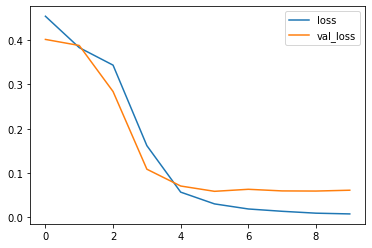

In [73]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

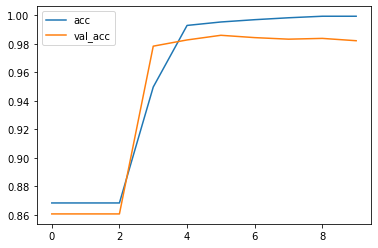

In [75]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

<h1>Math</h1>

now we are going to go back again to word embeddings (though this overlaps with what we said earlier , it is still useful)

---

<h4>Why do we need embeddings ?</h4>

NLP is machine learning applied to text

text is represented in a computer as a string

Deep learning (neural networks in particular) expects numbers as inputs

this is because the first thing we do in a neural network is multiplication

we know how we multiply numbers , we dont know how we multiply strings 

so the question is , how do we turn strings , specifically words , into numbers

thats what word embeddings are all about

---

<h4>what is a feature vector ?</h4>

The first thing we need to discuss when talking about word embedding is what are feature vectors ?

lets review what a feature vector is , in short we are going to first remind ourselves what we are doing in machine learning

we have some dataset and we want to analyse it

for ex , we want to take a survey of some of our students , and we want to predict whether or not they will succeed in our course

we may ask them some questions such as :

<ul>
    <li>Do you meet the prerequisites of this course ?</li>
    <li>Are you and independant learner and are you able to do independant research if you come acroos a topic you dont know ?</li>
</ul>

for each of these , the students will give us their score on a scale from 1 $\ldots$ 10

and so we tally these up for Alice,Bob,Carol,David,Eric and each of these rows is a feature vector

<img src='extras/32.7.PNG' width='700'></img>

so for example , the first row [10,10] thats a vector , the second row [1,1] is also a vector

remember that a vector is just a tuple of numbers

we can see that the number [10,10] maps to Alice succeeded

we see that Bob , [1,1] , maps to the student did not succeed

---

<h4>How do we use the data ?</h4>

<img src='extras/32.8.PNG' width='400'></img>

and so our goal in machine learning , say we are doing classification , is to draw a boundary between the yellow dots and the purple dots

The yellow dot mean succeeded and the purple dot mean did not succeed

lets see we have a new person , the grey point , and we want to be able to predict if this person will succeed in this course

we can use the boundary we found before (the black curve)

so if it falls on the yellow side we predict succeed , if it falls in the purple side we predict will not succeed

so why is this important ?

the basic idea is , the location of this vector is important , it tells us everything we need to know , it allows us to make accurate model predictions

so our goal is to always create feature vectors that put each individual point in a useful position relative to the others (very simple)

in this example , actually one encouraging thing about this is , if we look at the space , there is more space where student succeed and there is a very small space where students do not succeed , so we can conclude that most studens , if they fall under this big area , have a better chance of succeeding in this course

---

<h4>Now an NLP example</h4>

Another example with feature vectors but this time with NLP

usually with NLP we want to know the features of a word

so suppose we have a list of words [king,Queen,Prince,Princess,Britain,Spain]

now we want these to have some attributes so lets put them in a table

<table>
    <tr>
        <td></td>
        <td>Gender</td>
        <td>Age</td>
        <td>Place</td>
    </tr>
    <tr>
        <td>King</td>
        <td>+1</td>
        <td>+1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Queen</td>
        <td>-1</td>
        <td>+1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Prince</td>
        <td>+0.9</td>
        <td>-1</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Princess</td>
        <td>-0.8</td>
        <td>-0.9</td>
        <td>0.0000001</td>
    </tr>
    <tr>
        <td>Britain</td>
        <td>0</td>
        <td>0</td>
        <td>0.9</td>
    </tr>
    <tr>
        <td>Spain</td>
        <td>0</td>
        <td>0</td>
        <td>1</td>
    </tr>
</table>

so we might say , King is a very male word and it probably refers to an older person , it is also not a place so thats [+1,+1,0]

we can say princess is a very female word and it probably refers to a younger person , it is also not a place , so maybe [-0.8,-0.9,0.0000001]

sain has no gender associated with it nor age , but it is place so we say it has the feature vector [0,0,1]

and so these are feature vectors that correspond to words , so we call them word vectors

---

<h4>Automation</h4>

In real life , unlike with people , we cant ask each word what 'age' it feels like , in fact we cant ask words anything (also there are way too many words in the dictionary to individually survey)

so we need some automated way to find feature vectors for words

one very simple way is to just use counting 

---

<h4>How to count</h4>

suppsoe we are looking at the words : [Electron,Newton,Energy,Mitochondria,Cell]

now suppose we have some books , so we have our Favourite biology book and our favourite physics book and we count up each time one of those words appear in that book

we know that in the physics book , [Electron,Newton,Energy] are going to show up a lot , but [Mitochondria,Cell] probably wont

In a biology book , we know that [Mitochondria,Cell] are going to show up a lot , maybe [Energy] too (since it is related to both topics)

<table>
    <tr>
        <td></td>
        <td>favourite biology book</td>
        <td>favourite physics book</td>
    </tr>
    <tr>
        <td>Electron</td>
        <td>50</td>
        <td>800</td>
    </tr>
    <tr>
        <td>Newton</td>
        <td>1</td>
        <td>500</td>
    </tr>
    <tr>
        <td>Energy</td>
        <td>20</td>
        <td>350</td>
    </tr>
    <tr>
        <td>Mitochondria</td>
        <td>400</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Cell</td>
        <td>600</td>
        <td>30</td>
    </tr>
    
</table>

now what happens if we make a scatterplot of each point similar to what we did before ?

<img src='extras/32.9.PNG' width='400'></img>

well we can see that [Electron,Newton,Energy] show up close together , we can also see that [Mitochondria,Cell,Energy] show up close together

so these are reasonable feature vectors , we can also call these word vectors

---

<h4>In modern times ...</h4>

in modern times we have more interesting ways of finding these word vectors

typically this is an unsupervised task adn the output is going to be a list of feature vectors

but those feature vectors dont necessarily have to have any meaning for us humans

so before we did the example with agae,gender,place but when we use an unsupervised learning method each dimension can be whatever it wants , we as humans dont get to decide that

so they are not going to tell us , this is a biology word and this is a physics word , they might , but there is no guarantee that they will do

unsupervised learning means the model can find whatever it wants to find , it doesnot have to make any sense to us , it just has to make sense geometrically

and by geometrically we mean that , if we plotted the word vectors like we did earlier , we would still find that electron is probably close to ther physics related words and mitochondria is probably still close to other biology related words

when this happens , we call these vectors 'latent vectors' or 'hidden vectors'

it has the same meaning as the hidden layers of a neural network , they sure are useful at doing whatever task the neural network is doing , but if we look at them , its just a list of numbers , its not going to make any sense to us humans (and it doesnot have to)

and so typically we would find these word vectors using an algorithm such as Word2Vec,GloVe,FastText , these are the big three algorithms right now for finding word vectors 

---

<h4>Word Analogies</h4>

One interesting thing about these modern word vector techniques is that they model the relationships between words very well

so one famous application of word vectors is analogies

so if we take the vector of king and subtract from it the vector of man Vec('king') - Vec('man') ,  and we take the vector of queen and we subtract from it the vector of woman , Vec('queen') - Vec('woman') , we find that these two differences are approximately equal

---

<h4>Word Similarity</h4>

Another common task is word similarity , so we pick a wo rd , find its corresponding word vector , and then we try to find the words closest to it

those words end up being very related to each other

<img src='extras/32.10.PNG' width='600'></img>

so for example , we pick the word <span style="color:blue;">light</span> , and its close to <span style="color:blue;">fan</span> , <span style="color:blue;">led</span> and <span style="color:blue;">bulb</span> , so that makes sense

so the point is word vectors learn an effecient and useful representation of the words

---

<h4>what does this have to do with embeddings ?</h4>

word embeddings are word vectors :)

different name , same thing

so typically in deep learning we are working with matricies , every dense layer in a neural network is a matrix multiply

so if we line up each word vector one after the other we get a matrix , this matrix is called word embedding and it contains singular word vectors

<img src='extras/32.11.PNG' width='600'></img>

one important thing to remember is that each word has a specific row in this matrix

so later on we are going to have to have a way to map each word to its corresponding location in this matrix

---

<h4>Conventions</h4>

we refer to the vocabulary size , the total number of words in our data with V

we refer to the embedding dimension , the feature vector size , with the capital letter D

so the word embedding is a VxD matrix

---

<h4>Computational Trick</h4>

one important computational trick we learned about is this :

we know that when we have categorical variables such as words we need to one hot encode them , so

<ul>
    <li>A word at index 0 becomes [1,0,0,0,...,0]</li>
    <li>A word at index 1 becomes [0,1,0,0,...,0]</li>
    <li>A word at index 2 becomes [0,0,1,0,...,0]</li>
    <li>A word at index V-1 becomes [0,0,0,0,...,1]</li>
</ul>

so the index tells us the position of the 1 in the one-hot encoded vector

once we have one-hot encoded the words we can put them into the neural network as usual

one important thing to remember is that , when we are inputing words into the neural network , the first layer that attaches words to the rest of the neural network will always be an embedding

now where is the computational trick ?

well we know that in a neural network , the first step is to do a matrix multiply

---

<h4>Computational Trick</h4>

so lets look at an example , notice the results of the following multiplications between a one-hot encoded vector and a weight matrix

<img src='extras/32.12.PNG' width='350'></img>

notice how we get the row at index 0 in the weight matrix , and how [1,0,0] is the one-hot encoding of 0

<img src='extras/32.13.PNG' width='350'></img>

notice how we get the row at index 1 in the weight matrix , and how [0,1,0] is the one-hot encoding of 1

<img src='extras/32.14.PNG' width='350'></img>

notice how we get the row at index 2 in the weight matrix , and how [0,0,1] is the one-hot encoding of 2

so the pattern should be clear by now , multiplying a one hot encoded vector of some integer k by the weight matrix is the same as selecting the kth row from the weight matri

so this is equivalent to the much simpler and more effecient , W[k] , we should never multiply a one_hot vector by a matrix since this is very slow

in tensorflow , there is ```tf.nn.embedding_lookup``` should we need to make the selection manually

in keras the ```Embedding()``` layer is already doing that for us (never use ```Dense()``` for an embedding)


<h1>Math</h1>

we previously looked at algorithms such as word2vec/GloVe

for now what we want to do is something more like transfer learning (which we should have known about had we arranged these notebooks in a better order ) , where we take pretrained word embeddings , found by experts with more powerful computers than us , and initialise our neural network to use those embeddings instead

this is acctually pretty great since we already know that finding good hyperparameters is not easy , but in this way we can take advantage of results found by other experts

---

<h4>Using Word Embeddings</h4>

so architecturely speaking , how does this work ?

suppose we have some simple feedforwad neural network , remember that a neural network consists of a bunch of weight matricies at each layer

now typically , when we create a neural network , we would use random initialisation for these weight matricies

so for example , we would call ```np.random.randn()``` and multiply result by some small number to reduce the variance of those weights

but with pretraining , we dont initialsie randomly , instead we take this VxD matrix , and we fill it with pretrained state of the art values (available on the internet) 

so instead of ```W = np.random.randn(V,D)*0.01``` we do something like ```W = preloaded from CSV```

---

<h4>Problem!</h4>

now there is a slight problem when it comes to pretrained word embeddings , we might as k , what if there is a word in our dataset that doesnot appear in the pre-trained embeddings that we downloaded ?

typically this happens for uncommon words , since if a word was common then it probably shows up in the existing word embedding

so sometimes the words that dont appear might be so uncommon that it wont affect the results

but typically what we do in this situation is just to initialise those word embeddings randomly (or 0)

---

<h4>Train pre-trained embeddings ?</h4>

the next question we might have is , should we allow backpropagation to flow through word embeddings ?

we might think that this is necessary , since if some words have randomly initialised embeddings , then we definitely want to train them

unfortunately , most of the deep learning libraries dont have fine-grained control so that we only train the word embeddings that are not pre-trained , so its either train the entire matrix or none of it , the whole matrix gets updated or none of it gets updated

typically in transfer learning , we dont bother to train the pretrained weights and we just assume they are good , and we can do that here too

remember that uncommon words are definition 'uncommon' , so their prescence is small , and their effect on the results is also probably small

we can also assume that the word embeddings that are pretrained are already pretty good , so their might not be any need to fine tune them

their have been cases where fine-tuning lead to worse results , so for a real life project we would just have to experiment

so we try both and do whatever works best

---

<h4>In Keras</h4>

implementation-wise , remember that in keras , if we want to train the weights of a layer , we just set ```embedding_layer.trainable=True ``` , which is the default , to keep the weights constant we set ```embedding_layer.trainable=False```













<h1>Math</h1>

next we are going to do a quick introduction to CNNs (this will be discussed thoroughly later)

CNNs wont be a major concern for us at this point , the thing we want to get out of using CNNs is just setting up a simple static neural network and training it

---

<h4>What is a CNN ?</h4>

CNNs stand for Convolutional Neural Network , and what that means is , its a neural network with convolution

so to understand CNNs , we first have to understand convolution

normally in deep learning we use convolution on images which are two dimensional  , a typical example is edge detection

<img src='extras/32.15.PNG' width='350'></img>

so we can see above on the left , we have the original image , we have an image that kind of looks like the one on the left , but we can see white where there are edges in the original image and then black otherwise

---

<h4>Convolution</h4>

so what happens during convolution , is we have some kind of edge detection filter (or any other kind of filter) , and we slide this filter over every part of the input image

at each point where we slide it , we multiply the filter by the image pixels element-wise and we sum them all together to produce the result

<img src='extras/32.16.GIF' width='350'></img>

but then we might ask , how do we know what values we should put in the filter in order to get an edge detector ?

and of course this is machine learning so we dont want to choose these parameters manually

machine learning means that the machine is supposed to learn these parameters and in deep learning thats done by backpropagation

so as long as we can set up a loss function at the end of this neural network , and we can backpropagate the error , those filter parameters automatically be found during training

---

<h4>1-D Convolution</h4>

now when we are talking about things like audio and text , we actually have a simpler situation

audio an text are both 1D objects , because time is the only independant variable

so for now , we will be using 1D convolution and this is actually a lot simpler to visualise

<img src='extras/32.17.GIF' width='350'></img>

its just a signal going in one direction , and the filter slides along that signal  in that one direction

---

<h4>Cross-Correlation</h4>

now a lot of people dont know this , but what we call convolution in deep learning is actually not real convolution as its known in the rest of the engineering world

the operation we do in deep learning is actually called Cross-Correlation

$$Convolution : \left(f*g\right)\left[n\right] = \sum_mf[m]g[n\boxed{-}m]$$

$$Cross-Correlation : \left(f\star g\right)\left[n\right] = \sum_mf[m]g[n\boxed{+}m]$$

the only difference between true convolution and cross-correlation is that the filter is reversed for convolution

otherwise , these operations are all the same , just multiply and add

---

<h4>Why is Correlation Significant ?</h4>

we intuitively know what correlation means , if two  things are correlated to each other , then we say that they are correlated

in fact the word 'correlation' contains the word 'relation'

for example , we know that weight is correlated with height , so the taller we are , the heavier we probably are , so we say that height and weight have a strong correlation

---

so lets say we have two signals , one is our input signal and one is our filter

what happens if we perform convolution , or in other words cross-correlation between these input signal and this filter

<img src='extras/32.18.PNG' width='800'></img>

well the filter just acts as a pattern finder , it outputs a small number where the filter doesnot match the input and it outputs a big number where the filter does match the input

so the job of the filter is just to find the parts of the signal that look like itself , and it outputs a large number when that happens

so thats why we see that big spike in the middle , because as we slide the lower image across the upper image we find out that they match exactly when they are lined up perfectly in the centre

so thats what correlation does and thats what in deep learning we call convolution

---

<h4>1-D Convolution</h4>

one obvious application of 1D convolution on audio signals is speech recognition

this is because speech is recorded as an audio signal

<img src='extras/32.19.PNG' width='700'></img>

one of the most famous applications of NLP , speech recognition , involves taking a sound signal as input and producing the words being said as output (as text)

we might also call this text-transcription

---

recall that the first step of any neural network that takes in a sequence as input , is to create an embeddings of those words

or in other words , given a sequence of words we are going to turn that into a sequence of word vectors

well this basically creates a one-dimensional signal , but whereas audio is a scalar signal , where in each point of time we have one value , for word embeddings we get a vector signal , where for each point of time we have multiple values

"The quick brown fox" $\rightarrow$ [Vec("the"),Vec("quick"),Vec("brown"),Vec("fox")]

hmmmmmmmmmmmm

---

lets take a look at the structure of the data so this becomes clear 

<img src='extras/32.20.PNG' width='600'></img>

first we have a sequence of words , say of length T

then we convert each word into a vector by grabbing it from some pretrained word embedding , each of these vectors is of size D

so now we have T objects , each of them is of size D

we can also think of that as a TxD matrix if we stack them all together

now importantly that is not the same as a HxW (Height x Width) image 

with images , we use 2D convolution , so we are going to do convolution along the height dimension and the width dimension

with 1D convolution , we are only doing convolution along the time dimension , so we are only going down

---

<h4>Architecture</h4>

so the architecture of the model we are going to look at is going to be like this :

<img src='extras/32.21.PNG' width='600'></img>

<ol>
    <li>convert input sentence into sequence of word embeddings</li>
    <li>we do 1D Convolution on that 1D vector signal</li>
    <li>then we follow the usual pattern of a CNN , so that convolution followed by pooling , another convolution , another pooling and so on</li>
    <li>we do that a few times , then we pass it through a couple of dense layers to get the output prediction</li>
</ol>

 <h1>Code</h1>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D,Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score

In [2]:
# we can get the dataset from here
# https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data
# we will be using train.csv

MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100 # we will be using GloVe [50,100,200,300]
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [3]:
# first lets load in data and take a look at it
data = pd.read_csv('datasets/toxic comments/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# so we have a multilabel classification problem
X = data['comment_text'].to_numpy()
Y = data.iloc[:,2:].to_numpy()

In [5]:
# next lets tokenise our sentences
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(X)
X = tokeniser.texts_to_sequences(X)

word2idx = tokeniser.word_index

In [6]:
# next we pad our sentences
X = pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [7]:
# next we want to create our embedding matrix
# first we load in the pre trained word vectors
file = 'datasets/glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'
word2vec = {}
for line in open(file,encoding='utf8'):
    line = line.split()
    word = line[0]
    vec = line[1:]
    vec = np.array(vec).astype('float32')
    word2vec[word] = vec

In [10]:
V = min(len(word2idx)+1,MAX_VOCAB_SIZE)
# now lets create our embedding matrix
embedding = np.zeros((V,EMBEDDING_DIM))

# now we fill the matrix with the pretrained word embeddings
# if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx.items():
    vec = word2vec.get(word,0)
    if idx < V:
        embedding[idx] = vec

In [11]:
# now we are ready to build our model !

In [12]:
embedding_layer = Embedding(
    V,
    EMBEDDING_DIM,
    weights = [embedding],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable = False
)

In [27]:
# Input shape now is NxT
# so at each time step we have index of a word
i = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(i) # NxTxD
x = Conv1D(128,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3,activation='relu')(x)
# here we have a GlobalMaxPooling
# this means we have a time series and wedont care how long it is
# just take the max value in time series in each dimension
# so if the input is of size TxM , the output is of size M
# we can think of this as choosing which point of time was the most important for computing the output
x = GlobalMaxPooling1D()(x)
x = Dense(128,activation='relu')(x)
# we are doing 6 seperate binary classifications
o = Dense(Y.shape[1],activation='sigmoid')(x)

model = Model(i,o)

In [28]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics = ['accuracy']
)

In [29]:
r = model.fit(
    X,Y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/10
998/998 [==============================] - 49s 48ms/step - loss: 0.1047 - accuracy: 0.9369 - val_loss: 0.0752 - val_accuracy: 0.9936
Epoch 2/10
998/998 [==============================] - 46s 46ms/step - loss: 0.0687 - accuracy: 0.9926 - val_loss: 0.0712 - val_accuracy: 0.9934
Epoch 3/10
998/998 [==============================] - 46s 46ms/step - loss: 0.0629 - accuracy: 0.9927 - val_loss: 0.0684 - val_accuracy: 0.9932
Epoch 4/10
998/998 [==============================] - 46s 46ms/step - loss: 0.0587 - accuracy: 0.9928 - val_loss: 0.0694 - val_accuracy: 0.9941
Epoch 5/10
998/998 [==============================] - 46s 47ms/step - loss: 0.0571 - accuracy: 0.9930 - val_loss: 0.0716 - val_accuracy: 0.9843
Epoch 6/10
998/998 [==============================] - 46s 46ms/step - loss: 0.0534 - accuracy: 0.9926 - val_loss: 0.0687 - val_accuracy: 0.9941
Epoch 7/10
998/998 [==============================] - 46s 46ms/step - loss: 0.0524 - accuracy: 0.9938 - val_loss: 0.0822 - val_accuracy:

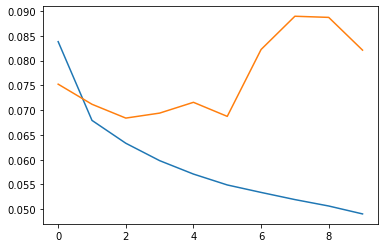

In [34]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

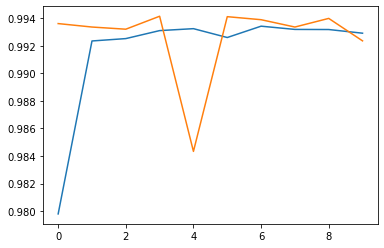

In [35]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.show()

In [36]:
# next lets calculate the auc score
# first we want to make predictions
p = model.predict(X)
# then we want to calculate auc for each column
# then take the mean
aucs = []
for i in range(p.shape[1]):
    auc = roc_auc_score(Y[:,i],p[:,i])
    aucs.append(auc)

print('AUC : ',np.mean(aucs))

AUC :  0.9776202939043088


<h1>Math</h1>

next is a review of RNNs

---

<h4>What is an RNN ?</h4>

so in the grand scheme of things , a CNN is still pretty basic

we have one input and we get one output , a static network

<img src='extras/32.22.PNG' width='300'></img>

if we think of our brain which consists of billions of neurons , they are not connected in some linear fashion where we have an input and they all just point towards the output

the neurons in our brain are all conencted together and their are many loops

when we make a decision now , we are not just making t hat decision based on what we see and hear now

we can read what we are writing now , and remember what we wrote before and so we can think and reason based on past inputs as well

so it is reasonable then to wonder what would happen if we added feedback loops to ANNs

---

The most basic RNN we can have looks like this , where we just connect the hidden layer back to itself

<img src='extras/32.23.PNG' width='500'></img>

since the independant variable here is time , our three major data variables need to be indexed by time 

so we call our input $x(t)$ (instead of just x) , we call our output $y(t)$ (instead of just y) , and we call the hidden layer value $h(t)$ instead of just h

---

since $x(t)$ is given, we dont need to calculate it

$$x(t) = given$$

since $y(t)$ only depends on $h(t)$ , calculating $y(t)$ is as simple as it usually is , just a regular dense layer

$$y(t) = softmax \left(W_o^T h(t) + b_o\right)$$

the layer of interest in an RNN is the hidden layer

to calculate $h(t)$ we add both a term that depends on $x(t)$ and a term that depends on $h(t-1)$

$$h(t) = \mathcal{f}\left(W_i^T x(t) + W_h^T h(t-1) + b_h\right)$$

since $x(t)$ is a vector of size D , and $h(t)$ is a vector of size M , we need to set the weight matricies to consistent with these sizes

so as usual , $W_i$ is of size $D\times M$ , $W_h$ must be of size $M \times M$ since it connects $h(t-1)$ to $h(t)$ and both of these are of size M , and assuming we are doing multiclass classification , the output $y(t)$ will be of size K and the output weight will be of size $M \times K$ as usual

$$shape(x(t)) = D \\ shape(h(t)) = M \\ shape(y(t)) = K \\ shape(W_i) = D \times M \\ shape(W_h) = M \times M \\ shape(W_0) = M \times K$$

---

one way to think of $h(t)$ is that it is just a feature vector like it is in a feed forward neural network but it also contains a "memory of the past" via $h(t-1)$

we can think of $W_h$ as a weight matrix that tells $h(t)$ which parts of $h(t-1)$ are important to remember and which are not

$$x(t) = given$$

$$h(t) = \mathcal{f}\left(W_i^T x(t) + W_h^T h(t-1) + b_h\right)$$

$$y(t) = softmax \left(W_o^T h(t) + b_o\right)$$

---

<h4>Unrolling an RNN</h4>

one way to think of RNNs is to just unroll them in time 

so if we imagine time going horizontally , and the neural netwok layers growing upwards , then we can unroll a neural network

<img src='extras/32.24.PNG'></img>

this brings us to an important idea which is that , what if we dont think of the sequence as a sequence in time but rather just a static set of inputs

so , lets forget about the fact that this is a sequence for now , and lets pretend we are just going to input a bunch of $x$s into this really stange looking neural network

well then we have what is simply a neural network with shared weights

so we see that $W_i$ shows up T times (here T = 4) , as well as $W_h$ and $W_o$

so it is a specially desined neural network , where the same weights keep repeating over and over again , so we dont have to think of it in terms of time

in this case its all happening at the same time , with this weird stange architecture

theoretically , these weights can also be hidden weights , such that we did not share the same weights at each stage , and that would also be perfectly fine

but its more common is the study of RNNs to keep using the RNNs over and over again

---

<h4>Feedforward Neural Networks</h4>

one question we might have is , well , if we want to classify a sequence , why cant we jsut input this sequence into the neural network , why do we need this special architecture ?

as an example suppose we have inputs [x(1),x(2),x(3),x(4)] (here we assume T=4)

but instead of putting this through an RNN , we just concatenate all the $x$s into one big vector of size $TD$

similarly , we create T diiferent $h$s and $T$ different $y$s , so that we have all the same variables we had before , except now thay are all concatenated together

<img src='extras/32.25.PNG' width='300'></img>

at the end we can just unconcatenate the outputs to get back each of the individual $y$s and $h$s (if we need them)

---

<h4>Numerical Calculation (feedforward)</h4>

well lets look at what happens if we do this (use ANN)

<ul>
    <li>Suppose<ul>
    <li>T = 20 (so every sequence is of length 20)</li>
    <li>D = 10 (input dimensionality)</li>
    <li>M = 15 (hidden layer size)</li>
    <li>K = 3 (number of output classes)</li>
</ul></li>
    <li>Input to hidden weight will be of size TxDxTxM = 60,000 parameters</li>
    <li>Hidden to output weight is of size TxMxTxK = 18,000 parameters</li>
    <li>Total : 78,000 parameters , not counting the bias terms</li>
</ul>

so this is a really big fat neural network

---

<h4>Numerical Calculation (RNN)</h4>

Now lets look at what happens if we had used an RNN

<ul>
    <li>Suppose<ul>
    <li>T = 20 (so every sequence is of length 20)</li>
    <li>D = 10 (input dimensionality)</li>
    <li>M = 15 (hidden layer size)</li>
    <li>K = 3 (number of output classes)</li>
</ul></li>
    <li>Input to hidden : DxM = 10x15 = 150</li>
    <li>Hidden to Hidden : MxM = 15x15=225</li>
    <li>Hidden to output 15x3 = 45</li>
    <li>Total = 420 parameters !</li>
</ul>

---

now we remember that we looked at the idea that a feedforward neural network is capable of approximating any function

so the feedforward neural network is the most general function approximator

so in theory , we actually have no need for RNNs since hte ANNs should work just fine

we even have a mathematical proof that it should work

unfortunately , as promising as that sounds , they dont work that well in practice

the reason is that they are over parameterised , in other words there are too many parameters

further there is no structure , so we just have tons of weights where everything is connected to everything which makes the model very flexible but incapable of learning anything

so with RNNs we have structure , we are taking into account the structure of the data , which allows us to have a fraction of the weights and allows us to use the weights we do have in a more intelligent way

---

<h4>Another Problem</h4>

there is also a big problem with the feedforward neural network (other than the fact that it has too many parameters) , which is that the input has to be constant size

thats not really very effective in reality since we can easily think of sequences that dont have context size 

for example sentences , or an audi signal of someone saying words , some sentences are longer than others , number of words in a document 

so Most problems in NLP deal with variable length sequences

<img src='extras/32.26.PNG' width='300'></img>

---

<h4>Variable Length Sequences</h4>

The reason we bring up the idea of variable length sequences is because in deep learning dealing with them is actually hard

RNN cells in Tensorflow (Keras) require constant-length sequences

Advantages:

<ul>
    <li>Easier to represent data , since data is always rectangulary shaped NxTxD</li>
    <li>N : number of samples , T : sequence length , D : input feature dimension</li>
    <li>Easier to store data in a numpy array , since numpy arrays dont work when we have multiple length sequences (T is not constant)</li>
    <li>if T is not constant , we must use list</li>
    <li>numpy arrays are superiror since we can do batch operations instead of looping over everything</li>
    <li>Easier to write code</li>
</ul>

---

<h4>Disadvantages</h4>

Despite the advantages of having constant length , there is still one big dis-advantage with this method

that is we have to choose T
 
sometimes we can choose T simply based on the maximum length sequence in our training set

but there are two major problem with that :

<ul>
    <li>If there is a sequence in our test set that is longer , then our network wont be able to handle it , we will be forced to cut parts of the neural network to make it fit into the neural network (will need to truncate it)</li>
    <li>now all sequences will be forced to have the same length as the maximum length sequence</li>
    <li>we can imagine that very long sentences are rare , so we might have a few sentences that are 50 words long but most sentences are maybe 5-10 words long , whats the result ?</li>
    <li>The result is that even though a sentence takes up only 5 words , we still need an array of size 50 to represent it</li>
    <li>that array is going to contain 45 0s , that means that we have to do 45 matrix multiplications that we dont have to do</li>
    <li>thats a lot of extra work , and a lot of extra processing time , just to multiply lots of 0s specially since very long sentences are so rare</li>
    
</ul>

<h1>Math</h1>

now for a review of GRUs and LSTMs

---

<h4>GRU</h4>

GRU : Gated Recurrent unit

This introduces the concept of gates which allow the hidden layer to remember or forget certain values

here is a diagram (pretty much useless)

<img src='extras/32.27.PNG' width ='300'></img>

and here are the equations :) 

$$Update \ gate \ : z_t = \sigma \left(W_{xz}^{\ T}x_t + W_{hz}h_{t-1} + b_z\right)$$

$$Reset \ gate \ : \ r_t = \sigma \left(W_{xr}^{\ T}x_t + W_{hr}^{\ T}h_{t-1} + b_r\right)$$

$$Candidate \ state : \hat h_t = \tanh \left(W_{xh}^{\ T}x_t + W_{hh}^{\ T} \left(r \circ h_{t-1}\right) + b_h\right)$$

$$Next \ state : h_t = \left(1-z_t\right) \circ h_{t-1} + z_t \circ \hat h_t$$

note : here we use $\circ$ t odenote element-wise multiplication

with the GRU we have two gates , we call $z_t$ the reset gate , and we call $r_t$ the update gate

lets consider $r_t \circ h_{t-1}$ in the Candidate state

$$Candidate \ state : \hat h_t = \tanh \left(W_{xh}^{\ T}x_t + W_{hh}^{\ T} \left(\boxed{r \circ h_{t-1}}\right) + b_h\right)$$

since $r_t$ is the output of a sigmoid , it contains only values between 0 and 1

so if we have something closer to 0 , that tells us forget about what was in this cell of $h_{t-1}$ , forget what was there by making it closer to 0

if it is closer to 1 , that is saying remember what was in that cell of $h_{t-1}$ and that value is important to remember

so its sort of a binary mask , but instead of only binary values 0 and 1 , there is a spectrum between 0 and 1 where we have different degrees of remembering and forgetting

we then use $x_t$ and $h_{t-1}$ to create a candidate value for $h_t$ which we will call $\hat h_t$

$$Candidate \ state : \hat h_t = \tanh \left(W_{xh}^{\ T}\boxed{x_t} + W_{hh}^{\ T} \left(r \circ \boxed{h_{t-1}}\right) + b_h\right)$$

In a simple RNN that would be it , we would set that to $h_t$ and we are done 

notice how the equation for $\hat h_t$ is very similar to the equation of $h_t$ in a simple recurrent unit except for the reset gate

But in the GRU we have yet another gate , $z_t$

this tells us how much of the candidate $h_t$ do we want to keep and how much of the old $h_{t-1}$ do we want to keep

notice how we multiply by $z_t$ or $1-z_t$ so we are always getting the weighted average of these 2 to create the new $h_t$

this also has a sort of rememberring and forgetting function , so if $z_t$ is very small then $(1-z_t)$ is bigger , closer to 1 , so thats like saying remember what was in $h_{t-1}$ before , otherwise if $z_t$ is close to 1 , then its saying take more of what is in $\hat h_t$

and by having these remembering and forgetting functions , we can make the neural network learn long term dependencies 

---

<h4>Systems of Neural Networks</h4>

one convineat way of conceptualising a GRU/LSTM is that they are really just a mini-system of neural networks

so the Update gate is made of a mini-binary classification neural network

the reset gate has a similar format , it is just a mini-binary classification neural network , actually they are jsut logistic regressions , which is even simpler

the prediction for the Hidden state is itself the output of a mini-neural network 

so basically we just have these mini-neural networks or neurons everywhere and they are all making their own little predictions about what the hidde nstate should be , how much to remember or forget and so on

---

<h4>Concatenation Trick</h4>

One cool trick we can do for convenience is that we see how $x_t$ and $h_{t-1}$ appear very often , these equations are also quite long

so what we can do when we are implementing them is , just concatenate $x_t$ and $h_{t-1}$ together into one big vector of size M+D and then create a giant weight matrix of size Mx(M+D) so that we only have one matrix multiply to do

<img src='extras/32.28.PNG' width="600"></img>

we can verify that we have the same number of parameters , just things are easier to write this way

our equations then become :

$$Update \ gate : z_t = \sigma \left(W_z^{\ T}[x_t,h_{t-1}]+bz\right)$$

$$Reset \ gate : r_t = \sigma \left(W_r^T [x_t,h_{t-1}] + b_r\right)$$

$$Candidate \ state : \hat h_t = \tanh \left(W_h^{\ T}[x_t,(r_t \circ h_{t-1})] + b_h\right)$$

$$Next \ state : h_t = (1-z_t) \circ h_{t-1} + z_t \circ \hat h_t$$  

---

<h4>LSTM</h4>

here is the useless diagram :

<img src='extras/32.29.PNG' width='300'></img>

what we can still get out of this diagram is that the LSTM haas 2 states , $C_t$ and $h_t$

we typically call $h$ the hidden state , hence the letter h , and we call $C$ the cell state , hence the letter C

---

so in an LSTM we basically have a gate for everything , importantly we now have two state vectors , $c_t$ and $h_t$

$c_t$ kind of takes on $h_t$ old role and $h_t$ is now jsut a small modification on $c_t$

here are the equations :

$$Forget \ gate : f = \sigma \left(W_{f}^{\ T} [x_t,h_{t-1}] + b_f\right)$$

$$Input \ gate : i_t = \sigma \left(W_i^T [x_t,h_{t-1}] + b_i\right)$$

$$Output \ gate : o_t = \sigma \left(W_o^T [x_t,h_{t-1}] + b_o\right)$$

$$Candidate \ cell : \tilde c_t = \tanh \left(W_c^T [x_t,h_{t-1}] + b_c\right)$$

$$Cell \ state : c_t = f_t \circ c_{t-1} + i_t \circ \tilde c_t$$

$$Hidden \ state : h_t = o_t \circ \tanh(c_t)$$

---

the input gate tells us us how much of the candidate $\tilde c_t$ to keep , the forget gate tells us how much of the previous cell state $c_{t-1}$ to keep

$$Cell \ state : c_t = \boxed{f_t \circ c_{t-1}} + \boxed {i_t \circ \tilde c_t}$$

note that in the GRU , $z_t$ performs both of these roles , in the LSTM forget and input are seperate gates (recall in the GRU we just had $z_t$ and $(1-z_t)$ )

finally the output gate just tells us how much of the cell to pass on to the output

$$Hidden \ state : h_t = \boxed{o_t \circ \tanh(c_t)}$$

note : sometimes we call $c_t$ the cell not to be confused with other uses of the word cell such as an element of a table or an element of a vector which is terminology we have used before

---

<h4>In Keras</h4>

Normally , each layer outputs one thing :

```output = Dense(128)(input)```

with recurrent units , we actually have the option to output the hidden states as well , in order to get the GRU and the LSTM to output the states we pass in the argument ```return_state=True``` 

so as per what we just discussed , the GRU will output that layers output along with the hidden state h

```output,h = GRU(128,return_state=True)(input)```

but the LSTM will output that layer's output along with the hidden state h and the cell state c

```output,h,c = LSTM(128,return_state=True)(input)```

one question we might as k is , what is the difference between a recurrent layer's output and its hidden state h , the answer is surprisingly is that they are not different , they actually output the same thing

---

<h4>return_sequences</h4>

one exception is that if we pass yet another argument , ```return_sequences=True```

if we do this then we will get a sequence of output values but the hidden state and cell state will still only give us the final value

```output,h,c = LSTM(128,return_state=True,return_sequences=True)(input)```

so here output is a sequence , but h and c are not

<h1>Math</h1>

Now, we will be looking at the different types of problems an RNN can solve

The general theme of this section is <strong>shapes</strong>

<img src='extras/32.30.PNG' width='400'></img>

as we know, when we are talking about deep learning, this is a very important topic

we always want to keep track of the shape of everything in our neural network

once we know the shape of something, the visualisation of it becomes implicit

the reason people often ask for pictures, is because they dont have a good visualistaion system

If we say a word like "rectangle" or "square" we should be able to picture that in our head immediately

so if we are not a very geometrical person, we should excercise these abilities since they are very helpful in deep learning

so if we say something like, this data is 2x3 a picture of that should pop-up in our head even if we are not shown one

---

<h3>Types of RNN task</h3>

So when we talk about different types of tasks that an RNN can solve, we are not talking about different applications, although we will be looking at several simple examples

So we dont mean an RNN can be used for machine translation, or it can be used to build a Question Answering System, or whatever

what we mean is, given an input of some shape, what kinds of shapes can we get at the output ?

---

<h3>RNN Input</h3>

lets first talk about, what is the shape of an RNN input ?

we will be saying this again and again , $T \times D$

so what is $T$ and what is $D$ ?

$T$ : is the sequence length

$D$ : is the vector dimensionality

so as an example, lets suppose we have a short sentence :

"The quick brown fox jumps"

5 words, so $T = 5$

now what happens to these words ?

well good thing we reviewed this, the first thing we always do when we put words into a neural network is what ?

word embeddings is the correct answer

ok, so each word becomes a word vector

since we had 5 words, that going to give us 5 word vectors

suppose our word vectors are of size 50, so $D=50$

we saw this in our CNN example earlier where we got to choose $D$, in the case where we are using pre-trained embeddings then we have limited selection, we have to choose whatever the authors give us

so lets say we choose $D=50$

Then we have 5 word vectors, each of them of size 50

so our input is $5 \times 50$

<img src='extras/32.31.PNG' width='400'></img>

one we have this sequence of words, we can pass it through any RNN unit, such as a GRU or an LSTM or any simple recurrent unit

---

Lets think of another situation where we might have a sequence of vectors

suppose we want to track the weather at several locations over time

so we pick 10 different locations, and every hour, we record the temperature at each location

lets say we do this for an entire day

so what does this give me ?

well at each point of time, we have 10 different temperatures corresponding to the 10 different locations

that means in this case, $D = 10$

since there are 24 hours in a day, that means we have recorded a sequence of 24 observations , so $T = 24$

Therefore, our data would be of size $24 \times 10$

---

The important thing to notice that, in either of these situations, whether we are measuring the weather or looking at setnences, the result we get is a $T \times D$ input signal into our RNN

---

<h3>RNN output</h3>

so now lets say, we take our input, whatever it is, and we pass it through an RNN

well we know that, for each input $x(t)$, we can calculate the hidden state $h(t)$ and the output prediction $y(t)$

the question now is, what is the meaning of $y(t)$ ?

In this section, we want to focus on the different types of tasks an RNN can do, so the meaning of $y(t)$ is particularly important

as an example, suppose we are doing spam classification, given the text in an email, we would like to know, is this email spam or not ?

<img src='extras/32.32.PNG' width='400'></img>

(we will look at this specific example later)

---

<h3>Spam Classification</h3>

So suppose we have an input email containing 100 words, that means we will end up with a sequence of 100 word vectors $x_1,x_2,\ldots,x_{100}$

for each of these, we can calculate $y_1,y_2,\ldots,y_{100}$

the big question here is, whoch of these $y$s do we care about ?

Remember that we have only one question which has a Yes\no answer , is this email spam or not ?

So it makes sense then to take $y_{100}$ as our answer since only $y_{100}$ has seen the entire email

if we look at some eariler outputs, say $y_{50}$ that means we have only read half the email which may not be enough

---

In fact, if we draw this out in a diagram, basically we see that what we can do is ignore all of the $h(t)$s except $h(100)$ and only calculate $y(100)$

<img src='extras/32.33.PNG' width='400'></img>

remember that this is easy to accomplish in keras, we just pass in ```return_sequences = False```, and this automatically only returns the last RNN output

---

<h3>Fancy method</h3>

There is actually an even fancier way to get just one output for an RNN, instead of considering an entire sequence of outputs, and this is something we are going to look at in the code

The answer is something we saw earlier when we looked at CNNs, which was Global Max Pooling

remember that this looks at a sequence of numbers, and regardless of its length, just returns the maximum value

<img src='extras/32.34.PNG' width='400'></img>

so this can be useful in spam classification, since maybe a very obvious spam word appears in the middle of an email or even near the beginning

for example, if an email starts with "Hi, I am a Nigerian Prince...", well we know thats probably going to be spam, we dont need to read to the end of the email to know that

and what might happen is, if we did read the whole email, we might end up losing that information by the time we got to the end

we claim that LSTMs are good at learning long-term dependencies, but there is still a limit

this appears in machine translation and all types of tasks, basically LSTMs are still better at processing short sequences than they are at very long sequences

so in any case, global max pooling allows us to consider all the $h(t)$s but still only get one output

we dont have to choose the last one since that might not be the best one

---

<h3>Back to shapes</h3>

so it makes sense to take only one $y$ as our output prediction

and since the theme of this section is shapes, and we are talking about classification, then supposing we have $K$ classes, our output will be of size $K$

<img src='extras/32.35.PNG' width='300'></img>

---

<h3>Parts-of-Speech Tagging</h3>

now lets consider a slightly more complex problem

this one is also NLP-related, and its called Parts-of-Speech Tagging, which is something we studied before several times

remember that POS Tagging classifies a word into something like noun,verb,adjective,...

So why are RNNs a good model for this task ?

well it has to do with the fact that some words are ambiguous

so we cant say that "milk" is definetly a noun or definetly a verb because the word "milk" can be either

<ul>
    <li>"I went to the grocery store I bough milk today" $\leftarrow$ "milk" is a noun</li>
    <li>"The thief wanted to milk her victims out of their savings" $\leftarrow$ "milk" is a verb</li>
</ul>

so and RNN is important for that problem, because it has to take into account the other words of the sentence

---

The other important part of the Parts-of-Speech Tagging problem is that we need to make a prediction for every word we see

so this is not like spam classification, where we just make one prediction for the entire sequence

each word of the sentence will have a corresponding parts-of-speech tag

so in this case, if we have $x_1,\ldots,x_{100}$, then we must also have $y_1,\ldots,y_{100}$

each of those $y$s is going to represent the predicted parts-of-speech tag for the corresponding word

<img src='extras/32.36.PNG' width='800'></img>

---

<h3>Back to shapes</h3>

lets again return to this idea of shapes

in this case, both our input and our output are of length $T$

But the input has $D$ dimensions, so its shape is $TxD$

if there are $K$ output classes, then the shape of the output will be $T \times K$

<img src='extras/32.37.PNG' width='300'></img>

---

<h3>Machine Translation</h3>

Lets think of another example, where we dont just have one output, but many

This one is very popular in NLP and is something we will be looking at later, that is Machine Translation

so for example, we have an input sentence in English, and then we predict an output sentence in Japanese

<img src='extras/32.38.PNG' width='500'></img>

we might see right away that there is a problem with this approach however, its that if we pass in 100 words in english, its most certainly not the case that the japanse translation also has 100 words

so how do we deal with the situation where the input sequence length is different from the output sequence length ?

well one strategy is to do something we have already talked about, thats just to pad all our sequences to be much longer than our data, so that all our data fits into the RNN

This allows us to have an input that is of different length than the output since they can just have variable amounts of padding

however, there is an even better approach than this, and that's something we will be talking about later

---

<h3>Back to shapes</h3>

so how can we think of the shapes if the input length and the output length and the output length are different

in this case we usually call the shape of the input $T_x \times D$, and we call the shape of the output $T_y \times K$

so the length of the input is $T_x$ and the length of the output is $T_y$

<img src='extras/32.39.PNG' width='300'></img>

---

<h3>Categories of Tasks</h3>

so looking at these tasks allows us to categorise each type of tasks

<img src='extras/32.40.PNG' width='700'></img>

<ul>
    <li>we can think of a regular feed-forward neural network as a one to one task</li>
    <ul>
        <li>we have one input and we get one output
</li>
        <li>for example we pass in an image, and we get what object is in that image</li>
    </ul>
    <li>we can think of things as like spam classification and sentiment classification as many to one
</li>
    <ul>
        <li>the input sequence contains many things, but the output is just one thing</li>
    </ul>
    <li>We can think of tasks like POS tagging and Machine translation as many to many</li>
    <ul>
        <li>The input is a sequence of many things, and the output is also a sequence of many things</li>
        <li>note how there are two different types of many to many here</li>
        <ul>
            <li>one of these, which we already talked about, is where the input sequence length is the same as the output sequence length</li>
            <li>but there is another type of many to many that we will be looking at later</li>
        </ul>
    </ul>
    <li>There is also a concept of one to many which we will see later on, but in general we can think of this as text generation </li>
    <ul>
        <li>We have looked at this in the past, where we did thigs like generate poetry</li>
    </ul>
</ul>








<h1>code</h1>

In [1]:
# this is an example to help us understand the shape of everything
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,LSTM,GRU
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 8 # sequence length
D = 2 # input dimensionality
M = 3 # hidden layer size

In [4]:
# next lets create some dummy input data
# just one sample of size (TxD)
# we can think of this as a single sentence of word vectors
X = np.random.randn(1,T,D)

In [5]:
# next we have our first experiment
i = Input(shape=(T,D))
x = LSTM(M,return_state=True)(i)

model = Model(i,x)

# now we capture three outputs , o,h,c
# o : actual output from LSTM 
# h : hidden state , same as o
# c : cell state
o,h,c = model.predict(X)
print('o',o)
print('h',h)
print('c',c)

o [[-0.0974059   0.0730459   0.01771228]]
h [[-0.0974059   0.0730459   0.01771228]]
c [[-0.17349625  0.16124561  0.03740309]]


In [6]:
# in our second LSTM experiment we pass retur_sequences=True
i = Input(shape=(T,D))
x = LSTM(M,return_state=True,return_sequences=True)(i)

model = Model(i,x)

o,h,c = model.predict(X)
# h and c are same as before
# o is a list of all hidden states 
# so we see 8 lists (T) each of size 3 (M)
print('o',o)
print('h',h)
print('c',c)

o [[[ 0.07153962  0.08506     0.21476986]
  [-0.19892992 -0.13391218 -0.0966043 ]
  [-0.12303185 -0.14212097  0.01647807]
  [ 0.01555805 -0.03163124  0.23405011]
  [ 0.10796213  0.06940186  0.26995882]
  [ 0.10736642  0.07418838  0.19604875]
  [ 0.07511207 -0.05569559 -0.03729638]
  [ 0.10174719 -0.01145611  0.07957759]]]
h [[ 0.10174719 -0.01145611  0.07957759]]
c [[ 0.19351314 -0.02114321  0.1362746 ]]


In [7]:
# next is an experiment for the GRU
i = Input(shape=(T,D))
x = GRU(M,return_state=True)(i)

model = Model(i,x)

# since GRU has only one state h only two things are returned
# again both o and h are the same
o,h = model.predict(X)

print('o',o)
print('h',h)


o [[-0.04380884  0.05802852  0.14173822]]
h [[-0.04380884  0.05802852  0.14173822]]


In [8]:
# pass return_sequences = True
i = Input(shape=(T,D))
x = GRU(M,return_state=True,return_sequences=True)(i)

model = Model(i,x)

o,h = model.predict(X)

print('o',o)
print('h',h)

o [[[ 0.11554503  0.13384068 -0.16903783]
  [ 0.06451906 -0.68656206  0.6032783 ]
  [ 0.22957173 -0.26279095  0.18927789]
  [ 0.27256823  0.06068474 -0.04105842]
  [ 0.14097208  0.24028166 -0.15049753]
  [ 0.03591045  0.1597526  -0.10280327]
  [-0.09302896  0.14200236  0.20374927]
  [ 0.01353341  0.11905333 -0.00562129]]]
h [[ 0.01353341  0.11905333 -0.00562129]]


<h1>code</h1>

In [13]:
# this is the same as the CNN example
# except that this time we use LSTM

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPool1D,Embedding
from tensorflow.keras.models import Model
from sklearn.metrics import roc_auc_score

In [25]:
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100 # we will be using GloVe [50,100,200,300]
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10
M = 15

In [17]:
# first lets load in data and take a look at it
data = pd.read_csv('datasets/toxic comments/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [18]:
# so we have a multilabel classification problem
X = data['comment_text'].to_numpy()
Y = data.iloc[:,2:].to_numpy()

In [19]:
# next lets tokenise our sentences
tokeniser = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokeniser.fit_on_texts(X)
X = tokeniser.texts_to_sequences(X)

word2idx = tokeniser.word_index

In [20]:
# next we pad our sentences
X = pad_sequences(X,maxlen=MAX_SEQUENCE_LENGTH)

In [21]:
# next we want to create our embedding matrix
# first we load in the pre trained word vectors
file = 'datasets/glove/glove.6B.'+str(EMBEDDING_DIM)+'d.txt'
word2vec = {}
for line in open(file,encoding='utf8'):
    line = line.split()
    word = line[0]
    vec = line[1:]
    vec = np.array(vec).astype('float32')
    word2vec[word] = vec


In [22]:
V = min(len(word2idx)+1,MAX_VOCAB_SIZE)
# now lets create our embedding matrix
embedding = np.zeros((V,EMBEDDING_DIM))

# now we fill the matrix with the pretrained word embeddings
# if a word is not in our pretrained vectors , we leave it as zeros

for word,idx in word2idx.items():
    vec = word2vec.get(word,0)
    if idx < V:
        embedding[idx] = vec


In [23]:
embedding_layer = Embedding(
    V,
    EMBEDDING_DIM,
    weights = [embedding],
    input_length=MAX_SEQUENCE_LENGTH,
    trainable = False
)


In [26]:
# now we are ready to build our model !
# Input shape now is NxT
# so at each time step we have index of a word
i = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(i) # NxTxD
x = LSTM(M,return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(128,activation='relu')(x)
# we are doing 6 seperate binary classifications
o = Dense(Y.shape[1],activation='sigmoid')(x)

model = Model(i,o)


In [27]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics = ['accuracy']
)

In [28]:
r = model.fit(
    X,Y,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split = VALIDATION_SPLIT
)

Epoch 1/10
998/998 [==============================] - 43s 40ms/step - loss: 0.1342 - accuracy: 0.8344 - val_loss: 0.0626 - val_accuracy: 0.9941
Epoch 2/10
998/998 [==============================] - 38s 38ms/step - loss: 0.0582 - accuracy: 0.9941 - val_loss: 0.0569 - val_accuracy: 0.9941
Epoch 3/10
998/998 [==============================] - 40s 40ms/step - loss: 0.0552 - accuracy: 0.9940 - val_loss: 0.0553 - val_accuracy: 0.9941
Epoch 4/10
998/998 [==============================] - 40s 40ms/step - loss: 0.0533 - accuracy: 0.9942 - val_loss: 0.0548 - val_accuracy: 0.9941
Epoch 5/10
998/998 [==============================] - 39s 39ms/step - loss: 0.0519 - accuracy: 0.9920 - val_loss: 0.0550 - val_accuracy: 0.9941
Epoch 6/10
998/998 [==============================] - 40s 40ms/step - loss: 0.0507 - accuracy: 0.9942 - val_loss: 0.0533 - val_accuracy: 0.9941
Epoch 7/10
998/998 [==============================] - 40s 40ms/step - loss: 0.0500 - accuracy: 0.9940 - val_loss: 0.0524 - val_accuracy:

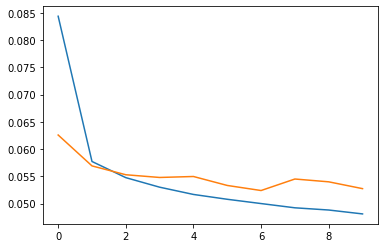

In [29]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

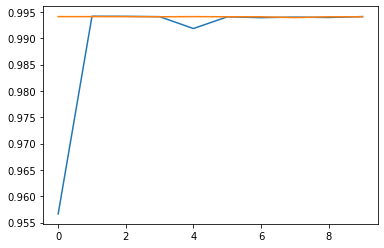

In [30]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.show()

In [34]:
# next lets calculate the auc score
# first we want to make predictions
p = model.predict(X)
# then we want to calculate auc for each column
# then take the mean
aucs = []
for i in range(p.shape[1]):
    auc = roc_auc_score(Y[:,i],p[:,i])
    aucs.append(auc)

print('AUC : ',np.mean(aucs))

AUC :  0.9800663702113223


<h1>Math</h1>

we end this by discussing some classical NLP problems and how neural networks can be used to solve them

---

<h4>Parts-of-Speech Tagging</h4>

The first of these problems is determining parts of speech

a part of speech tag is a category that you can assign to a word according to its syntactic function

In english , the main parts of speech are :

<ul>
    <li>noun</li>
    <li>pronoun</li>
    <li>adjective</li>
    <li>determiner</li>
    <li>verb</li>
    <li>adverb</li>
    <li>preposition</li>
    <li>conjunction</li>
    <li>interjection</li>
</ul>

---

<h4>Data</h4>

Here is an example of what the data looks like :

```
Confidence NN B-NP
in IN B-PP
the DT B-NP
pound NN I-NP
is VBZ B-VP
widely RB I-VP
expected VBN I-VP
```
so each token is on a seperate line and the tag is beside it , we are interested in the first 2 columns

---

<h4>F1</h4>

we want to calculate the F1 score , which is the harmonic mean of the precision and recall

$$F1 = 2 \times \frac{precision\times recall}{precision+recall}$$

$$Precision = \frac{TP}{TP+FP}$$

$$Recall = \frac{TP}{TP+FN}$$

<h1>code</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.metrics import f1_score

from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,SimpleRNN,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Metric

In [2]:
# first lets load in the data
# an empty line marks the end of a sentence

# first train data
Xtrain = []
Ytrain = []

# none token represents something we would see in train but not in test
word2idx = {'<none>':1}
pos2idx = {'<pad>':0}
# start from one since we are going to pad
i = 2
# this starts from 1 , so pad has its own class
j = 1
sent = []
pos_tags = []

for line in open('datasets/chunking/train.txt'):
    line = line.rstrip().split()
    if line == []:
        Xtrain.append(sent)
        Ytrain.append(pos_tags)
        sent = []
        pos_tags = []
        continue

    w,pos,_ = line
    if w not in word2idx:
        word2idx[w] = i
        i+=1
    if pos not in pos2idx:
        pos2idx[pos] = j
        j+=1
    sent.append(word2idx[w])
    pos_tags.append(pos2idx[pos])

In [3]:
# again for test
Xtest = []
Ytest = []

none = word2idx['<none>']
sent = []
pos_tags = []

for line in open('datasets/chunking/test.txt'):
    line = line.rstrip().split()
    if line == []:
        Xtest.append(sent)
        Ytest.append(pos_tags)
        sent = []
        pos_tags = []
        continue

    w,pos,_ = line
    sent.append(word2idx.get(w,none))
    pos_tags.append(pos2idx[pos])

In [4]:
# next lets pad our sequences
max_seq_length = max([len(sent) for sent in Xtrain])

Xtrain = pad_sequences(Xtrain,maxlen=max_seq_length)
Xtest = pad_sequences(Xtest,maxlen=max_seq_length)

Ytrain = pad_sequences(Ytrain,maxlen=max_seq_length)
Ytest = pad_sequences(Ytest,maxlen=max_seq_length)

In [5]:
Xtrain,Ytrain = shuffle(Xtrain,Ytrain)
Xtest,Ytest = shuffle(Xtest,Ytest)

In [6]:
Ytrain = Ytrain.astype('int64')
Ytest = Ytest.astype('int64')

In [7]:
# V = word2idx + 1 for padding
V = len(word2idx) + 1
# number of clasess
K = len(pos2idx)
# embedding dim
embedding_dim = 10
epochs = 20
M = 10
batch_size = 128
learning_rate = 1e-2

In [8]:
# now lets create our model

i = Input(shape=(Xtrain.shape[1]))
embedding = Embedding(
    V,
    embedding_dim,
    weights = [np.random.randn(V,embedding_dim)],
    input_length=max_seq_length,
    trainable = True
)

x = embedding(i)
x = SimpleRNN(M,return_sequences=True)(x)
o = Dense(K,activation='softmax')(x)
model = Model(inputs = i,outputs=o)

In [9]:
# now we need to make our own accuracy function 
class accuracy(Metric):

    def __init__(self, name='accuracy', **kwargs):
        super(accuracy, self).__init__(name=name, **kwargs)
        self.right = self.add_weight(name='right', initializer='zeros')
        self.wrong = self.add_weight(name='wrong', initializer='zeros')

    def update_state(self, T,Y, sample_weight=None):
        # T is of shape NxT
        # Y is of shape NxTxK
        Y = tf.math.argmax(Y,axis=-1) # so now Y is of shape NxT
        # we need to filter out padding , remember those have a class of 0
        T = T[Y>0]
        Y = Y[Y>0]
        # from here it is the cross entropy
        right = tf.cast(T==Y,tf.float32)
        wrong = tf.cast(T!=Y,tf.float32)
        tf.math.reduce_sum(right)
        self.right.assign(self.right+tf.math.reduce_sum(right)) 
        self.wrong.assign(self.wrong+tf.math.reduce_sum(wrong)) 
        
    
    def result(self):
        return self.right/(self.right+self.wrong)
    
    def reset_states(self):
        self.right.assign(0)
        self.wrong.assign(0)

    
    

In [10]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics = [accuracy()]
)


In [11]:
r = model.fit(
    Xtrain,Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = (Xtest,Ytest)
)

Epoch 1/20
70/70 [==============================] - 4s 38ms/step - loss: 2.4584 - accuracy: 0.0774 - val_loss: 0.8190 - val_accuracy: 0.3873
Epoch 2/20
70/70 [==============================] - 1s 20ms/step - loss: 0.7287 - accuracy: 0.4564 - val_loss: 0.5054 - val_accuracy: 0.5722
Epoch 3/20
70/70 [==============================] - 1s 20ms/step - loss: 0.4285 - accuracy: 0.6475 - val_loss: 0.3568 - val_accuracy: 0.7258
Epoch 4/20
70/70 [==============================] - 1s 20ms/step - loss: 0.2782 - accuracy: 0.7924 - val_loss: 0.2859 - val_accuracy: 0.8078
Epoch 5/20
70/70 [==============================] - 1s 21ms/step - loss: 0.1942 - accuracy: 0.8636 - val_loss: 0.2492 - val_accuracy: 0.8383
Epoch 6/20
70/70 [==============================] - 1s 20ms/step - loss: 0.1452 - accuracy: 0.8934 - val_loss: 0.2297 - val_accuracy: 0.8562
Epoch 7/20
70/70 [==============================] - 1s 20ms/step - loss: 0.1149 - accuracy: 0.9149 - val_loss: 0.2198 - val_accuracy: 0.8721
Epoch 8/20
70

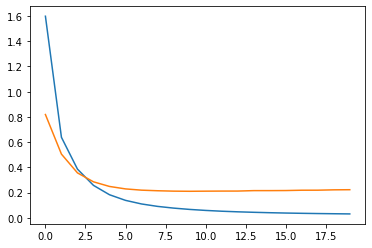

In [12]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

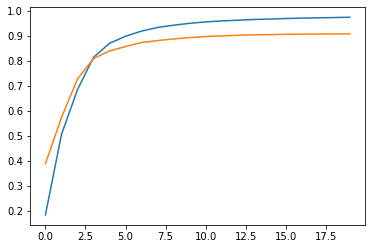

In [13]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.show()

In [14]:
p = model.predict(Xtest)
Ypred = np.argmax(p,axis=-1)
f1 = f1_score(Ytest.flatten(),Ypred.flatten(),average='weighted')
print('f1-score : ',f1)

f1-score :  0.9738424217244399


<h1>Math</h1>

next we discuss another classical NLP problem , Named Entity Recognition

---

<h4>Named Entity Recognition</h4>

This is similar to POS tagging , where we want to tag each token in a sentence

However with NER we are interested in what type of entity the token is , for ex :

<ul>
    <li>person</li>
    <li>company</li>
    <li>location</li>
</ul>

so they are all proper nouns

one difference between this problem and POS tagging is that the NER data is very imbalanced

by that we mean that most words in the dataset are not entities at all , they are just regular words

we can already see , for example , how most of the words written in this sentence are not entities (not a person's/company's name , location ...) , but just regular words

That is something we may/may not need to account for (we will see in the code)

---

<h4>Easy NER</h4>

Now what is one way to make NER easy ?

In Classical NER solutions , they would use the fact that the first letter was capitalised to tell if it was a Named Entity or not  but we can see how this may be considered cheating

we would rather use the structure of the sentence than the fact that it starts with a capital letter to determine whether its a named entity t

in modern times the capital letter approach wouldnt work well anyway

well , on sites liek twitter and in chat messages , people often dont capitalise proper nouns

so we cant use rules like : if a word starts with a capital letter , then it has a higher probability of being a proper noun

at that point we are not even doing machine learning , we are doing regular programming

because of this , in our code , we are going to lowercase everything first

we also dont want to consider @usernames as actual names since that would also be regular programming (in which we could achieve 100% very easily)

---

<h4>Data</h4>

the data can be found <a href = 'https://github.com/aritter/twitter_nlp/tree/master/data/annotated'>here</a>

the file we are interested in is ner.txt

a good idea is to establish a baseline first , for example using logistic regression (but lets be lazy :) )

---

<h4>Sample</h4>

```
@paulwalk	O
It	O
's	O
the	O
view	O
from	O
where	O
I	O
'm	O
living	O
for	O
two	O
weeks	O
.	O
Empire	B-facility
State	I-facility
Building	I-facility
=	O
ESB	B-facility
```
Its again a very simple format , again each token is on a single line and the tag is beside it

<h1>code</h1>

In [21]:
# the code should look pretty similar to before
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

from sklearn.utils import shuffle
from sklearn.metrics import f1_score

from tensorflow.keras.layers import Input,Dense,LSTM,Embedding,SimpleRNN,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import Metric

from sklearn.model_selection import train_test_split

In [25]:
# first lets load in the data
# an empty line marks the end of a sentence

# first train data
X = []
Y = []

# none token represents something we would see in train but not in test
word2idx = {'<none>':1}
ne2idx = {'<pad>':0}
# start from one since we are going to pad
i = 2
# this starts from 1 , so pad has its own class
j = 1
sent = []
nes = []

for line in open('datasets/ner.txt'):
    line = line.rstrip().split()
    if line == []:
        X.append(sent)
        Y.append(nes)
        sent = []
        nes = []
        continue

    w,ne = line
    if w not in word2idx:
        word2idx[w] = i
        i+=1
    if ne not in ne2idx:
        ne2idx[ne] = j
        j+=1
    sent.append(word2idx[w])
    nes.append(ne2idx[ne])

In [27]:
# pad sequences
# next lets pad our sequences
max_seq_length = max([len(sent) for sent in X])

X = pad_sequences(X,maxlen=max_seq_length)
Y = pad_sequences(Y,maxlen=max_seq_length)


In [29]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.33)

In [35]:
Ytrain = Ytrain.astype('int64')
Ytest = Ytest.astype('int64')

In [36]:
# V = word2idx + 1 for padding
V = len(word2idx) + 1
# number of clasess
K = len(pos2idx)
# embedding dim
embedding_dim = 10
epochs = 20
M = 10
batch_size = 128
learning_rate = 1e-2

In [37]:
# now lets create our model

i = Input(shape=(Xtrain.shape[1]))
embedding = Embedding(
    V,
    embedding_dim,
    weights = [np.random.randn(V,embedding_dim)],
    input_length=max_seq_length,
    trainable = True
)

x = embedding(i)
x = SimpleRNN(M,return_sequences=True)(x)
o = Dense(K,activation='softmax')(x)
model = Model(inputs = i,outputs=o)

In [38]:
# now we need to make our own accuracy function 
class accuracy(Metric):

    def __init__(self, name='accuracy', **kwargs):
        super(accuracy, self).__init__(name=name, **kwargs)
        self.right = self.add_weight(name='right', initializer='zeros')
        self.wrong = self.add_weight(name='wrong', initializer='zeros')

    def update_state(self, T,Y, sample_weight=None):
        # T is of shape NxT
        # Y is of shape NxTxK
        Y = tf.math.argmax(Y,axis=-1) # so now Y is of shape NxT
        # we need to filter out padding , remember those have a class of 0
        T = T[Y>0]
        Y = Y[Y>0]
        # from here it is the cross entropy
        right = tf.cast(T==Y,tf.float32)
        wrong = tf.cast(T!=Y,tf.float32)
        tf.math.reduce_sum(right)
        self.right.assign(self.right+tf.math.reduce_sum(right)) 
        self.wrong.assign(self.wrong+tf.math.reduce_sum(wrong)) 
        
    
    def result(self):
        return self.right/(self.right+self.wrong)
    
    def reset_states(self):
        self.right.assign(0)
        self.wrong.assign(0)


In [39]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=learning_rate),
    metrics = [accuracy()]
)


In [40]:
r = model.fit(
    Xtrain,Ytrain,
    batch_size=batch_size,
    epochs=epochs,
    validation_data = (Xtest,Ytest)
)

Epoch 1/20
13/13 [==============================] - 2s 48ms/step - loss: 3.1353 - accuracy: 0.1504 - val_loss: 1.6168 - val_accuracy: 0.8683
Epoch 2/20
13/13 [==============================] - 0s 16ms/step - loss: 1.2660 - accuracy: 0.9249 - val_loss: 0.6463 - val_accuracy: 0.9511
Epoch 3/20
13/13 [==============================] - 0s 13ms/step - loss: 0.5952 - accuracy: 0.9464 - val_loss: 0.4249 - val_accuracy: 0.9522
Epoch 4/20
13/13 [==============================] - 0s 13ms/step - loss: 0.4036 - accuracy: 0.9474 - val_loss: 0.3076 - val_accuracy: 0.9516
Epoch 5/20
13/13 [==============================] - 0s 14ms/step - loss: 0.3005 - accuracy: 0.9480 - val_loss: 0.2531 - val_accuracy: 0.9512
Epoch 6/20
13/13 [==============================] - 0s 15ms/step - loss: 0.2649 - accuracy: 0.9444 - val_loss: 0.2267 - val_accuracy: 0.9507
Epoch 7/20
13/13 [==============================] - 0s 13ms/step - loss: 0.2271 - accuracy: 0.9477 - val_loss: 0.2117 - val_accuracy: 0.9506
Epoch 8/20
13

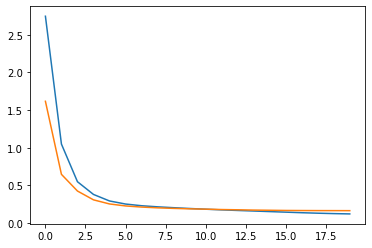

In [41]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()

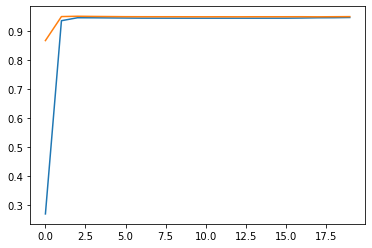

In [42]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.show()

In [57]:
p = model.predict(Xtest)
Ypred = np.argmax(p,axis=-1)
f1 = f1_score(Ytest.flatten(),Ypred.flatten(),average='weighted')
print('f1-score : ',f1)

f1-score :  0.963112475012743
